# BL40A2010 Introduction to IoT-Based Systems

## Assignment 3, 17.09.2020

### Author: Kristen Sirel

**(1) Compute the following for a ring topology of $N\geq3$ nodes considering that the network in unweighted and the links are directed. The result will give these number as a function of $N$.** 

Answer:

In a ring each node is connected one to two other nodes and never the same.

(a) Degree of nodes: 2  
	
(b) Adjacent matrix: Example adjacent ring matrix. The order of nodes can vary.
$$
A = \begin{pmatrix} 
 0 & 1 & 0 & 0 & 0 &... & 1 \\
 1 & 0 & 1 & 0 & 0 &... & 0 \\
 0 & 1 & 0 & 1 & 0 &... & 0 \\
 0 & 0 & 1 & 0 & 1 &... & 0 \\
 ... & ... & ... & ... & ... & ... & ... \\ 
 1 & 0 & 0 & 0  & ... & 1  &  0
\end{pmatrix}
$$

(c) Diameter: $N/2$ Network keeps getting bigger..

(d) Clustering coefficient of the nodes: $0$ In a ring the nodes are connected only to neighbours and there is no connection between the neighbours.



**(2) Use NetworkX to draw and analyze a ring topology with 5 nodes. Verify if the results previously obtained are valid.**

In [30]:
!pip install -r requirements.txt
!pip install --upgrade networkx
!pip install --upgrade scipy

import networkx as nx 
import matplotlib.pyplot as plt 
import scipy as sp
import numpy as np

Requirement already up-to-date: networkx in /srv/conda/envs/notebook/lib/python3.7/site-packages (2.5)
Requirement already up-to-date: scipy in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.5.2)


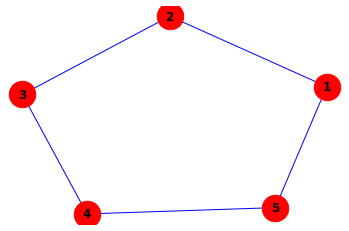

In [31]:
T = nx.Graph()
T.add_nodes_from([1,2,3,4,5])
T.add_edge(1, 2)
T.add_edge(2, 3)
T.add_edge(3, 4)
T.add_edge(4, 5)
T.add_edge(5, 1)

nx.draw_networkx(T, node_color='red', font_color='black', edge_color='blue', font_weight='bold',  node_size=700)
plt.axis('off')
plt.show()

In [32]:
T.degree()

DegreeView({1: 2, 2: 2, 3: 2, 4: 2, 5: 2})

a) Node degree is $2$

In [33]:
A=nx.adjacency_matrix(T)
print(A.todense())

[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]


b) The adjacent matrix does not match example, mostly because order of the nodes connected is different. 

In [34]:
nx.diameter(T)

2

c) Diameter: $2$ The diameter function does not tell you does it output decimals or how it rounds. Function worked with a ring topology of 4 and 6 nodes results being 2 and 3.

In [35]:
nx.clustering(T)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

d) Clustering coefficient: $0$

**(3) Analyze the ring topology with size 20 ($N=20$) as a communication network (i.e. how data travel to a point to another in the network) based on the node degree, the network diamenter and the cluster coefficient.**

Answer: In a ring communication network every node is connected only to two other nodes that are its neighbours thus making a ring. This means if two nodes at the opposite side of the ring want to communicate to each other the data must go through eight other nodes. This is same for other nodes they must pass data through other nodes. Ring topology is very vulnerable to attacks, it is easy to separate a node from the network only links. It is also easy to split the network. Ring has a low node degree $(2)$, large diameter $(N/2$) and cluster coefficient of $0$. This makes ring network a bad option for a network where data speed and transfer efficiency are a priority. Long distance between nodes and few links between nodes.

**(4) Consider the ring network from the previous question. The network performance depends on its diameter. As a designer, you can add one new node in the network (and an unlimited number of links that this node is part) . Justify your decision and evaluate how much better the network is. Generalize this finding as a function of $N$.**

*Hint:*  Follow Exercise 1 approach to generalize the finding.

Answer: By adding the node at the middle of the ring and connecting it to every other node, the diameter of the ring is reduced from $10$ to $2$. This way every node can communicate to every other node through only one node whereas before they had to go through multiple other nodes. This addition changes the network topology. Every other node added after this to maintain diameter of $2$ can be added to the middle and connected to every other node or added to the ring and connected like other nodes in the ring. Creating a new graph of $N+1$ nodes.